
##kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=12345)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['alcohol','magnesium']])
X_test_scaled = scaler.transform(X_test[['alcohol','magnesium']])

mass = np.array([1, 3, 5, 10, 15, 25])
mass_trained = []

print('NN' + '\t ' + 'Train' + '\t ' + 'Test')
for k in (mass):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)
    y_predicted_train = clf.predict(X_train_scaled)
    y_predicted_test = clf.predict(X_test_scaled)
    mass_trained.append(clf)
    print(
        f'{k:2}\t {accuracy_score(y_train, y_predicted_train):.4f}\t {accuracy_score(y_test, y_predicted_test):.4f}')

NN	 Train	 Test
 1	 1.0000	 0.6296
 3	 0.8226	 0.7407
 5	 0.8065	 0.7407
10	 0.7581	 0.7222
15	 0.7419	 0.6667
25	 0.7419	 0.6667


In [ ]:
!pip install mlxtend

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

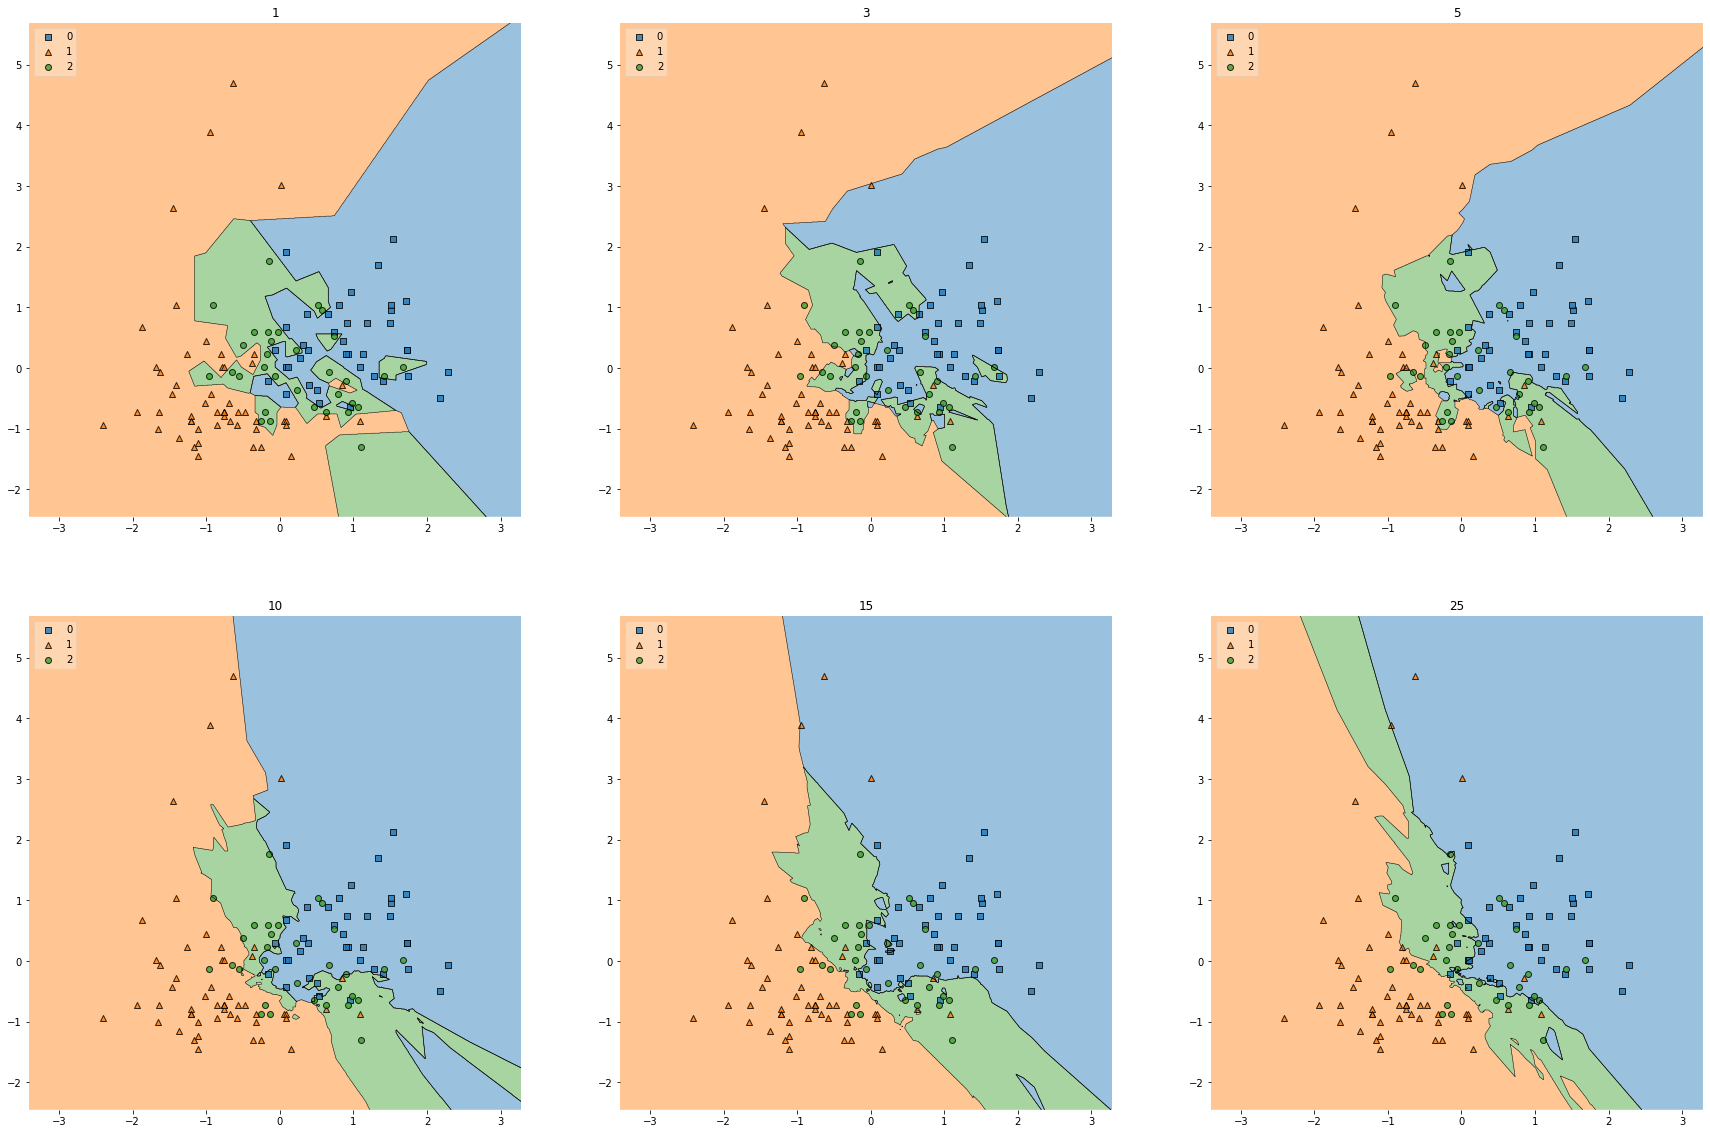

In [ ]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(30, 20))
for clf, lab, grd in zip(mass_trained, mass,
                         list(itertools.product([0, 1, 2], repeat=2))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(
        X_train_scaled, y_train, clf, legend=2)
    plt.title(lab)

### Задание 2: Обученная машина.

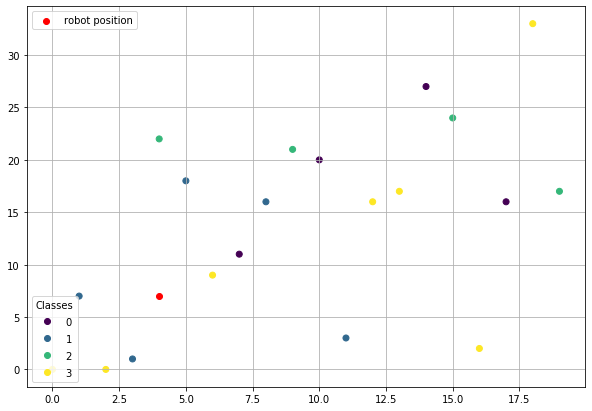

In [ ]:
np.random.seed(12345)
x = np.arange(20)
# сгенерируем случайные метки
landmarks = x + np.round(np.random.normal(2, 8, 20))
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(x, landmarks, c=random_classes)
ax.scatter(4, 7, c='r', marker='o', label='robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
class MobileRobot():

    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours

        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)

        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points

        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks

        '''
        # Store the history of movements
        self.trajectory = [initial_position.copy()]

        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)

        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]),
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}

    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        to_the_right = np.random.binomial(1, 0.2)

        if to_the_right:
            count_append = self.trajectory[-1].copy()
            count_append += self.mapping[0]
            self.trajectory.append(count_append.copy())
        else:
            count_append = self.trajectory[-1].copy()
            predicted = self.knn.predict(count_append[np.newaxis, :])[0]
            count_append += self.mapping[predicted]
            self.trajectory.append(count_append.copy())

In [ ]:
def conduct_experiment(x,
                       mean=0,
                       std=2,
                       n_movements=10,
                       k=3,
                       initial_position=np.array([10, 20])):

    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack(
        (x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size=len(x))

    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)

    for n in range(n_movements):
        robot.move()

    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c=classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1],
            c='r', marker='o', label='robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

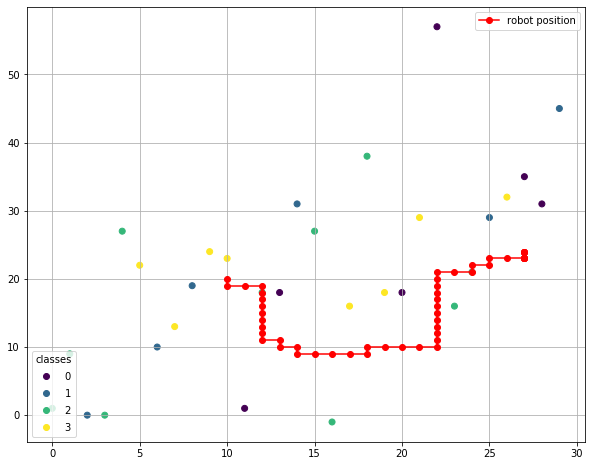

In [ ]:
x = np.arange(30)
conduct_experiment(x, mean=3, std=10, k=5, n_movements=50)

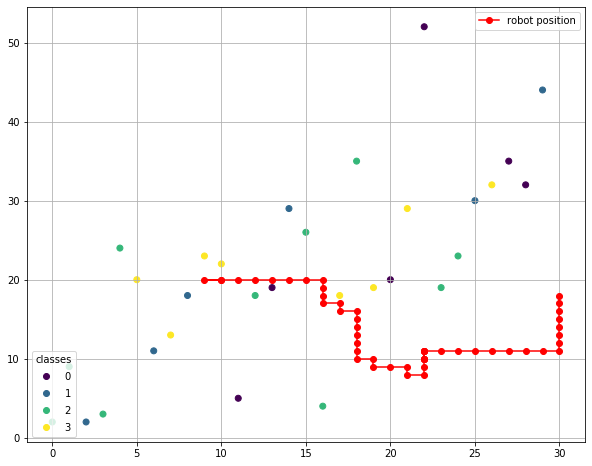

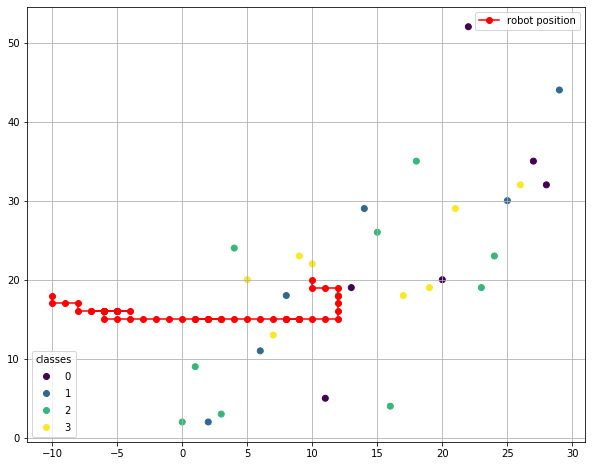

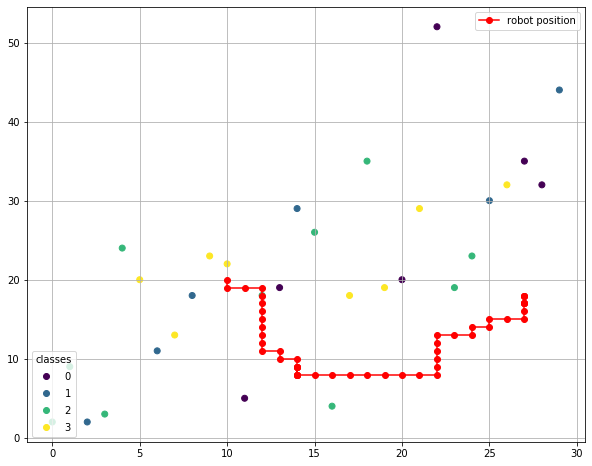

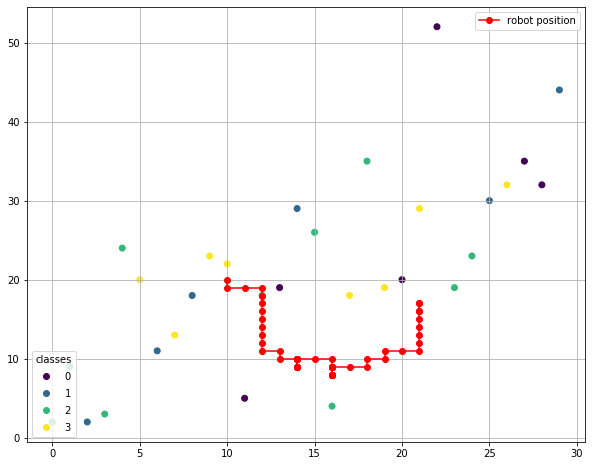

In [ ]:
mass_for_example = [3, 6, 9, 12]
x = np.arange(30)
for neigh in (mass_for_example):
    conduct_experiment(x,
                       mean=4,
                       std=8,
                       n_movements=50,
                       k=neigh)

### Задание 3: Линейная регрессия.

In [ ]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
data = data.drop('Unnamed: 0', 1)

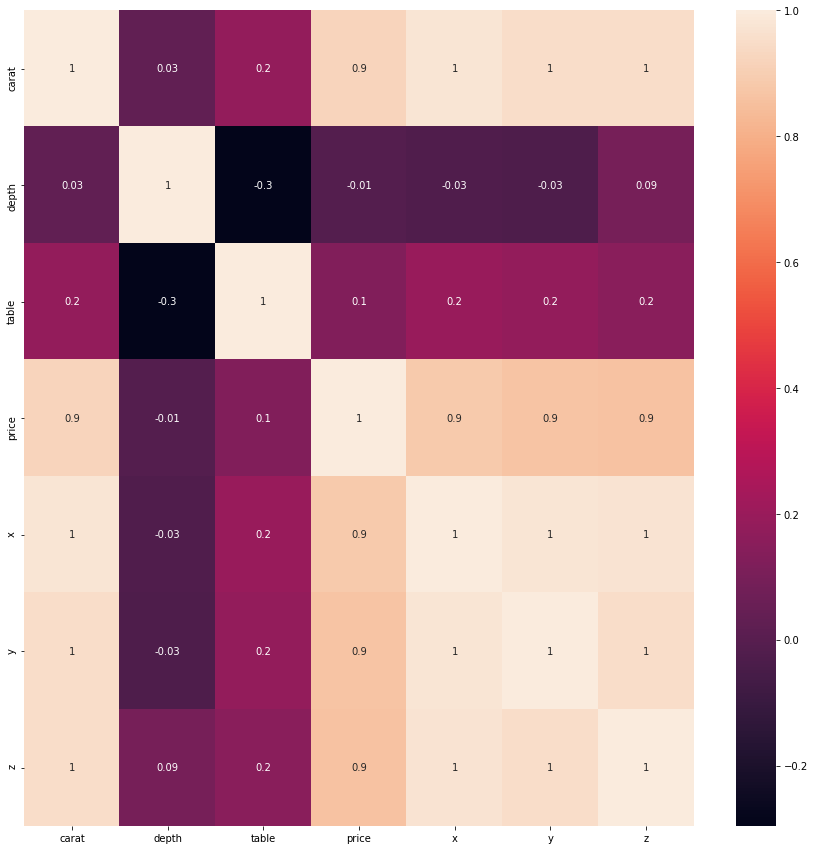

In [ ]:
import seaborn as sns
fig = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt='.1g')
#с целевой переменной лучше всего коррелируют признаки "carat", "x", "y" и "z".

In [ ]:
data = pd.get_dummies(data)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data.drop('price', 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train_scaled, y_train)

print('Train: ', mean_squared_error(y_train, lr.predict(X_train_scaled)))
print('Test: ', mean_squared_error(y_test, lr.predict(X_test_scaled)))

Train:  1310118.7779581891
Test:  1200741.4177305254


In [ ]:
lr.coef_
#оценки коэффицентов при категориальных признаках, которые были получены с помощью OHE, на порядок превышют оценки
#прочих вещественных переменных 

array([ 5.27724713e+03, -8.35859541e+01, -5.68696252e+01, -1.05010216e+03,
       -6.54293136e-01, -1.28889279e+01, -1.25601746e+02, -4.07564081e+01,
        5.15111488e+01,  1.47055432e+01,  2.81697664e+00,  2.09666446e+02,
        1.59982203e+02,  1.38024337e+02,  5.73039455e+01, -1.29323243e+02,
       -2.49568765e+02, -3.86217565e+02, -4.74135304e+02,  2.47389557e+02,
       -1.54469560e+02, -4.91150384e+02,  2.05041395e+02,  1.03588949e+02,
        2.55165018e+02,  2.71730554e+02])

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
clf_lasso = Lasso(10).fit(X_train_scaled, y_train)
clf_ridge = Ridge(10).fit(X_train_scaled, y_train)
print('lasso Train: {}'.format(mean_squared_error(
    y_train, clf_lasso.predict(X_train_scaled))))
print('lasso Test: {}'.format(mean_squared_error(
    y_test, clf_lasso.predict(X_test_scaled))))
print('ridge Train: {}'.format(mean_squared_error(
    y_train, clf_ridge.predict(X_train_scaled))))
print('ridge Test: {}'.format(mean_squared_error(
    y_test, clf_ridge.predict(X_test_scaled))))
print(clf_lasso.coef_)
print(clf_ridge.coef_)
# Веса при lasso-регуляризации уменьшились, а некоторые вообще занулились. Проблема мультиколлинеарности не сильно
# проявилась, так как сорее всего в датасете присутвуют выбросы.

lasso Train: 1321003.3793482897
lasso Test: 1221416.1396652614
ridge Train: 1310179.1369082427
ridge Test: 1201799.1433801572
[4827.68704651  -51.11785433  -43.66715276 -611.20952026   -0.
  -23.65271965 -126.66005875  -41.87813088   42.22291766    0.
   -0.          145.64838546   89.18090336   67.27095884   -0.
 -172.82437437 -279.07783198 -401.96670033 -489.27589314  195.96089079
 -261.22105723 -574.71534988  103.0830066    -0.          187.22374807
  192.98332386]
[ 5.24178491e+03 -8.11498932e+01 -5.66086246e+01 -1.00925118e+03
 -2.96683574e+00 -1.70427234e+01 -1.25762276e+02 -4.08532699e+01
  5.15266746e+01  1.46675177e+01  2.96976677e+00  2.09420875e+02
  1.59765102e+02  1.37605935e+02  5.70618290e+01 -1.29101124e+02
 -2.48980199e+02 -3.85468603e+02 -4.73611403e+02  2.47711833e+02
 -1.54993806e+02 -4.90971847e+02  2.04872395e+02  1.03413424e+02
  2.55593038e+02  2.71952560e+02]


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249432058.0036621, tolerance: 61021966.73059439
  positive)


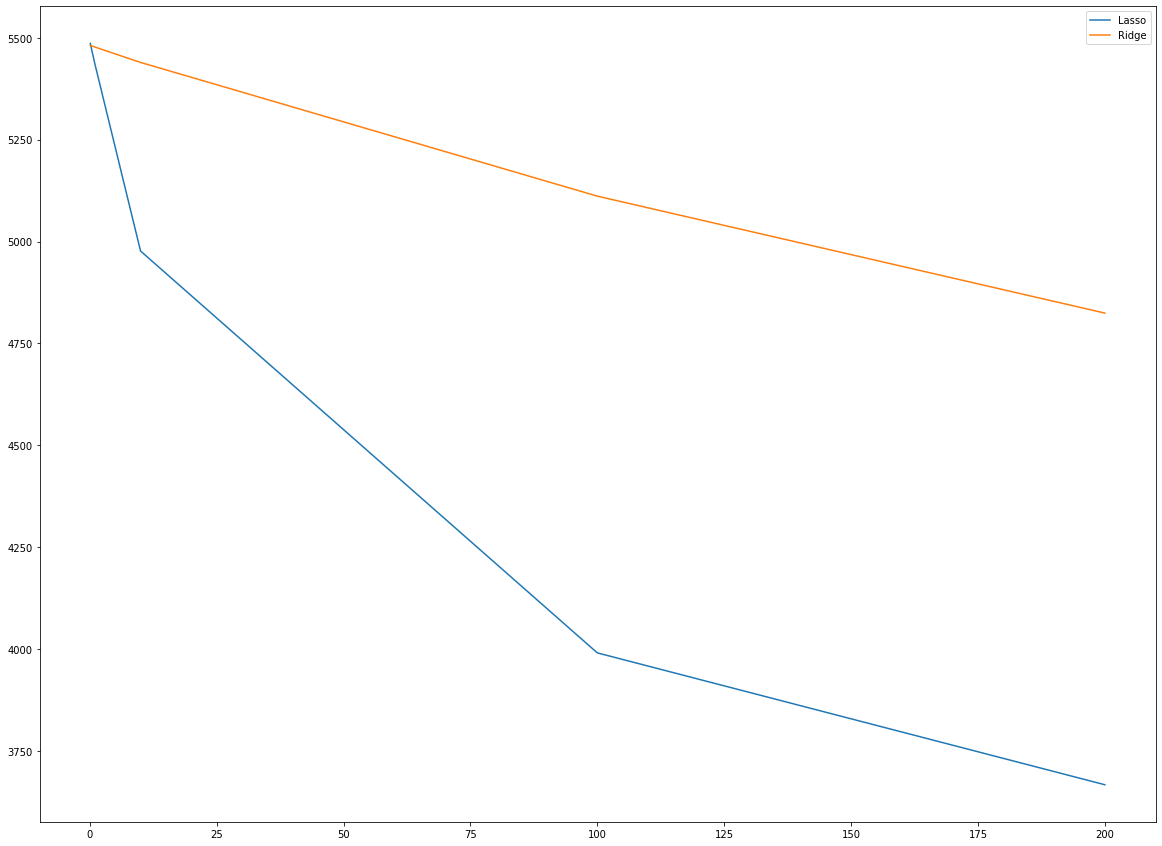

In [ ]:
mass = [0.1, 1, 10, 100, 200]
clf_lasso_coefs = []
clf_ridge_coefs = []
for i in mass:
    lasso_element_coef = Lasso(i).fit(X_train_scaled, y_train)
    clf_lasso_coefs.append(np.linalg.norm(lasso_element_coef.coef_))
    ridge_element_coef = Ridge(i).fit(X_train_scaled, y_train)
    clf_ridge_coefs.append(np.linalg.norm(ridge_element_coef.coef_))
fig = plt.figure(figsize=(20, 15))
ax = plt.plot(mass, clf_lasso_coefs)
ax = plt.plot(mass, clf_ridge_coefs)
ax = plt.legend(['Lasso', 'Ridge'])
#В данном случаем Lasso сильнее уменьшает веса. Lasso используют часто для отбора признаков, так как некоторые признаки она зануляет.

In [ ]:
from sklearn.linear_model import LassoCV
lasso_sv = LassoCV(alphas=mass, cv=5).fit(X_train_scaled, y_train)
lasso_sv_optimal = lasso_sv.alphas_[lasso_sv.mse_path_.mean(axis=1).argmin()]
print(lasso_sv_optimal)

1.0


In [ ]:
lasso_sv_trained = Lasso(lasso_sv_optimal).fit(X_train_scaled, y_train)
coefs = abs(lasso_sv_trained.coef_).round(2)
print(sorted(coefs))
# из отсортированного списка видно, что "carat" наиболее информативный признак
# Действивтельно, так как все драгоценные камни оценивают именно по каратам, потому что они представляют для покупателя наибольший интерес
# наименне информатинвыми оказались признаки с названиями "clarity_VS2", "cut_Very Good", "z"
# это так же можно объяснить, так как данные признаки не представляют особой ценности в отличие от того же карата и признака "x"

[0.0, 0.0, 0.0, 0.0, 9.53, 14.22, 36.07, 49.34, 55.49, 80.36, 83.03, 104.19, 115.0, 130.71, 161.55, 179.11, 192.15, 199.36, 202.15, 260.18, 290.62, 415.66, 501.35, 582.94, 1006.85, 5232.71]


In [ ]:
print('lasso Train: ', mean_squared_error(
    y_train, lasso_sv_trained.predict(X_train_scaled)))
print('lasso test: ', mean_squared_error(
    y_test, lasso_sv_trained.predict(X_test_scaled)))
print('lineal Train: ', mean_squared_error(
    y_train, lr.predict(X_train_scaled)))
print('lineal test: ', mean_squared_error(
    y_test, lr.predict(X_test_scaled)))
#В данном случае линейная регрессия показала результат немного лучше с точки зрения MSE, но данные модели справились примерно одинаково.
#Одна модель оказалась немного лучше другой из-за того, что не налблюдалась проблема мультиколлениарности и были выбросы в датасете, которые сильно влияют на качество.

lasso Train:  1310226.1058598354
lasso test:  1201967.9127904468
lineal Train:  1310118.7779581891
lineal test:  1200741.4177305254
